# <center> Curso Machine Learning e Imágenes en Python

* Docentes: Dra. Valeria S. Rulloni - Dra. Ana Carolina Maldonado
* Ayudantes: Catherine Acuña y Joaquín Funes
* Colaboran: Ing. Juan Manuel López
* Ing. Axel Aguerreberry -  Ing. Sebastián Palacio

## Temario a desarrollar:
*	Uso y herramientas básicas de Python
*	Imágenes digitales: tipos (binarias, monocromáticas y a color)
*	Histograma. Mejora de la imagen: contraste, filtros: suavizado y detección de bordes.
*	Umbralado y Binarización. Operaciones Morfológicas: erosión, dilatación, cierre y apertura.
*	Aplicaciones
*	Clasificación de imágenes.
*	**Aprendizaje automático**
*	Aprendizaje profundo: Redes neuronales
*	Aplicaciones

**CLASE 9: 04-10-22**

Datos, tipos , varias variables, visualización, formalización, preprocesado,normalización, transformaciones, proyecciones, ACP.

    
**Imágenes necesarias: 'Campo.jpg','daisy.jpg'**



# Aprendizaje automático

### Aprendizaje supervisado
- Regresión

- Clasificación

### Aprendizaje no supervisado
- Clustering

- Reconocimiento de patrones


### Aprendizaje semi supervisado
- Auto-aprendizaje/ Self-Learning

### Aprendizaje por refuerzos

- penalizaciones o refuerzos, se usa en juegos, por ejemplo


# Datos

En cualquier problema de aprendizaje automático hay que conocer los Datos con los que se trabaja.

Entre otras cosas identificar:

* que cosas/objetos/individuos/muestras queremos clasificar, agrupar, decir o predecir de ellos,

* que datos o información tenemos de éstos

**Veamos y trabajemos con algunos ejemplos y datos disponibles, y su estructura usual:**

Para esto usaremos librerías útiles

para estructura y manejo de datos:  **pandas**

para visualización agregamos **seaborn** y **plotly**, además de **matplotlib**

para datos, procesado, aprendizaje: **sklearn**



In [26]:
#librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import cv2

import pandas as pd
import seaborn

from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

from sklearn.datasets import load_wine
from sklearn import preprocessing
from collections import Counter

## FIFA 2019

Datos bajados de la database de Kaggle (https://www.kaggle.com/karangadiya/fifa19) como 'data.csv'.

In [27]:
url='https://raw.githubusercontent.com/DiploDatos/AprendizajeNOSupervisado/master/2021/data.csv'
#path='data.csv''

In [28]:
df=pd.read_csv(url)
#df=pd.read_csv(path)
df.head(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [29]:
df.tail(4)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K
18206,18206,246269,G. Nugent,16,https://cdn.sofifa.org/players/4/19/246269.png,England,https://cdn.sofifa.org/flags/14.png,46,66,Tranmere Rovers,...,43.0,40.0,43.0,50.0,10.0,15.0,9.0,12.0,9.0,€165K


In [30]:
print(df.columns)
print(len(df.columns), 'variables')

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [31]:
print(df.Crossing)

0        84.0
1        84.0
2        79.0
3        17.0
4        93.0
         ... 
18202    34.0
18203    23.0
18204    25.0
18205    44.0
18206    41.0
Name: Crossing, Length: 18207, dtype: float64


### Visualizamos de a una característica

Distribución de datos

#### Datos numéricos. histograma

Una variable o caractarística con valores posibles en un intervalo, continua o pseudo-continua, puede ser discreta o tipo entero pero correspondiente a un dscretizado o redondeo.

89.0
[84. 79. 17. 93. 81. 86. 77. 66. 13. 62. 88. 55. 68. 82. 75. 15. 14. 70.
 58. 78. 52. 90. 64. 87. 60. 12. 69. 46. 30. 80. 11. 57. 83. 85. 20. 73.
 53. 72. 36. 44. 45. 40. 27. 76. 63. 65. 48. 61. 47. 89. 19. 49.  9. 71.
 74. 24. 18. 38. 92. 56. 67. 35. 25. 50. 29. 10. 42. 54. 59. 91. 51. 43.
 33. 34. 16. 39. 28.  8. 21. 23. 41. 32. 37. 31. 22.  7. 26.  6.  5. nan]


<Axes: >

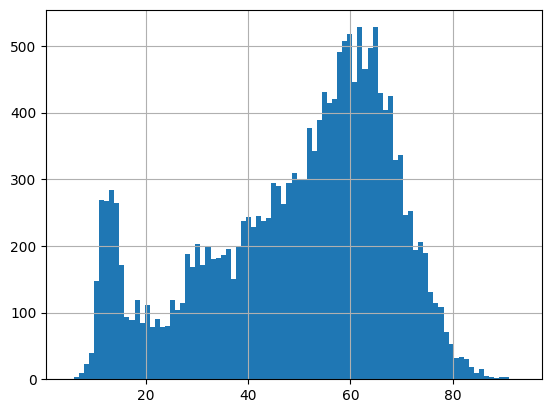

In [32]:
print(df.Crossing.max()-df.Crossing.min()+1)
nbins=89

print(df['Crossing'].unique())
df['Crossing'].hist(bins = nbins)

In [33]:
print(df.Crossing.describe())

count    18159.000000
mean        49.734181
std         18.364524
min          5.000000
25%         38.000000
50%         54.000000
75%         64.000000
max         93.000000
Name: Crossing, dtype: float64


In [34]:
print(df['Preferred Foot'].describe())

count     18159
unique        2
top       Right
freq      13948
Name: Preferred Foot, dtype: object


##### Ejercicio
Interpretar el histograma

In [35]:
print(df.Overall)

0        94
1        94
2        92
3        91
4        91
         ..
18202    47
18203    47
18204    47
18205    47
18206    46
Name: Overall, Length: 18207, dtype: int64


**Realizamos el histograma de la variable "Overall" (Desempeño global)**

In [36]:
print(df.Overall.describe())

count    18207.000000
mean        66.238699
std          6.908930
min         46.000000
25%         62.000000
50%         66.000000
75%         71.000000
max         94.000000
Name: Overall, dtype: float64


49


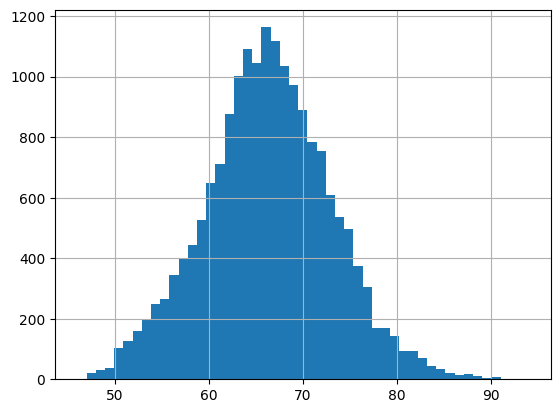

In [37]:
nbins=1*(df.Overall.max()-df.Overall.min())+1
df['Overall'].hist(bins = nbins)
print(nbins)

##### Ejercicio
Interpretar el histograma en conjunto con las medidas descriptivas

Dato: La variable **'Overall'** se calcula usando otras variables de desempeño del jugador (skills_ratings), utilizando redondeo

La variable 'Overall' es numérica discreta, (pero de "naturaleza" continua) así como las otras de desempeño según habilidad ('Crossing',
       'Finishing', 'HeadingAccuracy', etc.), tomando valores enteros entre 0 y 100, más allá del tipo de dato en estos casos.
       

#### Datos Discretos (categóricos, numéricos) - countplot

Conteos por posición:

para variable categórica o discreta: counplot

(array([   0.,  500., 1000., 1500., 2000., 2500.]),
 [Text(0.0, 0, '0'),
  Text(500.0, 0, '500'),
  Text(1000.0, 0, '1000'),
  Text(1500.0, 0, '1500'),
  Text(2000.0, 0, '2000'),
  Text(2500.0, 0, '2500')])

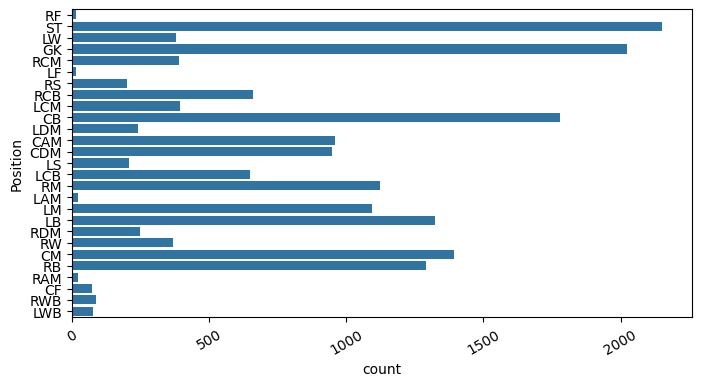

In [38]:
fig = plt.figure(figsize=(8,4))
seaborn.countplot(df.Position)  #hue=
plt.xticks(rotation=30)
#seaborn.despine()

In [39]:
print(df.Nationality)

0        Argentina
1         Portugal
2           Brazil
3            Spain
4          Belgium
           ...    
18202      England
18203       Sweden
18204      England
18205      England
18206      England
Name: Nationality, Length: 18207, dtype: object


(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.,
        1800.]),
 [Text(0.0, 0, '0'),
  Text(200.0, 0, '200'),
  Text(400.0, 0, '400'),
  Text(600.0, 0, '600'),
  Text(800.0, 0, '800'),
  Text(1000.0, 0, '1000'),
  Text(1200.0, 0, '1200'),
  Text(1400.0, 0, '1400'),
  Text(1600.0, 0, '1600'),
  Text(1800.0, 0, '1800')])

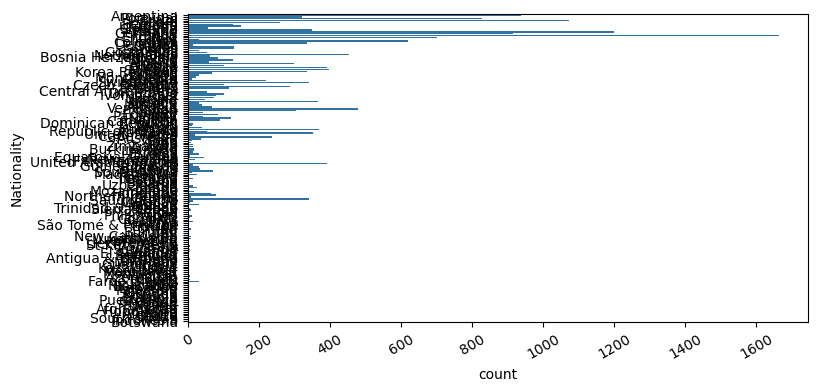

In [40]:
fig = plt.figure(figsize=(8,4))
seaborn.countplot(df.Nationality)
plt.xticks(rotation=30)

<Axes: xlabel='count', ylabel='Preferred Foot'>

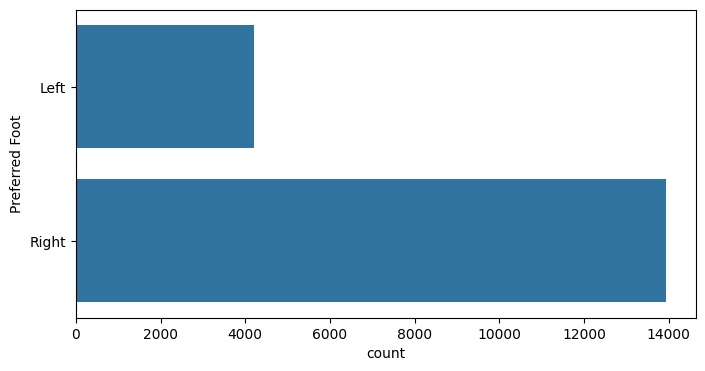

In [41]:
fig = plt.figure(figsize=(8,4))
seaborn.countplot(df['Preferred Foot'])  #hue=

Opcional: Mejores jugadores por posición:
Miramos ahora los mejores jugadores por posicion, usando las variables 'Overall' y 'Position'.

In [42]:
best_players_per_position=df.iloc[df.groupby(df['Position'])['Overall'].idxmax()][['Position','Name','Overall']]
best_players_per_position

,Position,Name,Overall
17,CAM,A. Griezmann,89
12,CB,D. Godín,90
20,CDM,Sergio Busquets,89
271,CF,Luis Alberto,82
67,CM,Thiago,86
3,GK,De Gea,91
28,LAM,J. Rodríguez,88
35,LB,Marcelo,88
24,LCB,G. Chiellini,89
11,LCM,T. Kroos,90


In [43]:
pd.DataFrame(df.Position.value_counts().sort_index())

,count
Position,
CAM,958
CB,1778
CDM,948
CF,74
CM,1394
GK,2025
LAM,21
LB,1322
LCB,648


Opcional: Mejores Promedios de Overall por equipos

In [44]:
#club_avg_overall=df.groupby("Club")["Overall"].mean().reset_index().sort_values("Overall",ascending=False)
#club_avg_overall.head(8)

### Graficamos varias características


#### Categóricas o discretas. crosstab

Dos categóricas o discretas:

crosstab, tabla de contingencia

In [45]:
pd.crosstab(index=df['Preferred Foot'],
            columns=df.Position) #, margins=True)

Position,CAM,CB,CDM,CF,CM,GK,LAM,LB,LCB,LCM,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
Preferred Foot,,,,,,,,,,,,,,,,,,,,,
Left,256,341,126,18,249,206,9,1163,264,97,...,14,32,41,23,6,252,37,97,4,293
Right,702,1437,822,56,1145,1819,12,159,384,298,...,1277,630,350,225,10,872,166,273,83,1859


Se puede visualizar con un heatmap o mapa de calor

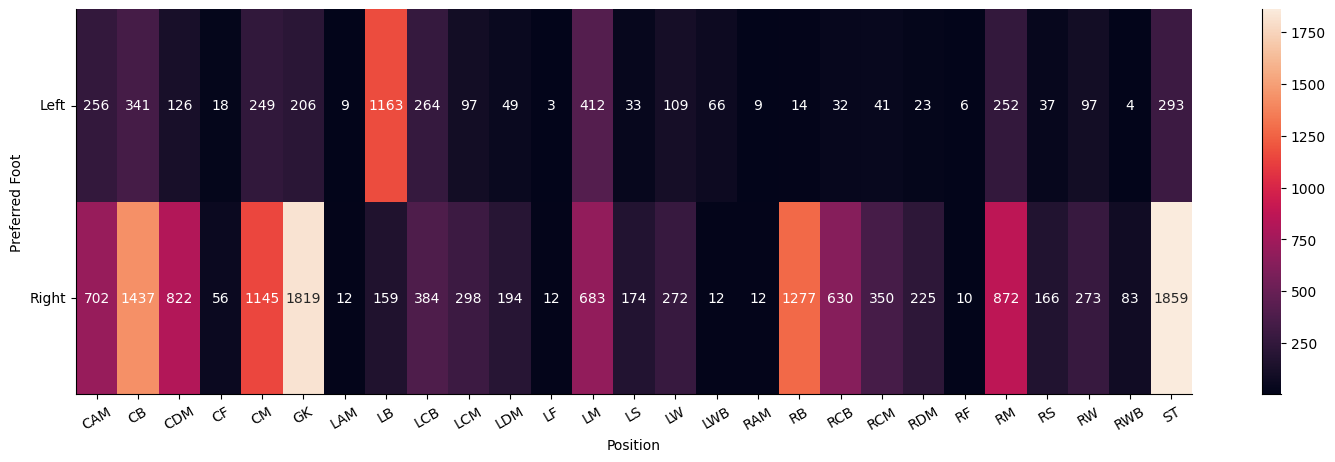

In [46]:
fig = plt.figure(figsize=(18,5))
exp = pd.crosstab(index=df['Preferred Foot'],
            columns=df.Position)

seaborn.heatmap(exp, annot=True, fmt='g')
plt.xticks(rotation=30)
plt.yticks(rotation=0)
seaborn.despine()

#### Numéricas contínuas o pseudo-continuas. scatterplot

primero restringimos la base sólo a algunas características numéricas

In [47]:
n=1500 #achicamos la base

df_n=df.loc[0:n] #se reduce la base a los n primeros jugadores

df_n=df_n[(df_n['Overall']>70)] # seleccionamos sólo a los mejores

skills_ratings = ['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
                  'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
                  'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
                  'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
                  'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
                  'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
                  'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
print(len(skills_ratings), 'variables numéricas de desempeño según habilidad')

34 variables numéricas de desempeño según habilidad


In [48]:
df_skills=df_n[skills_ratings] #base, sólo con desempeños según habilidad (numéricas)

In [49]:
df_skills.shape

(1501, 34)

In [50]:
df_skills.head(4)

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0


In [51]:
df_skills.tail(4)

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
1497,70.0,67.0,49.0,78.0,72.0,81.0,72.0,70.0,65.0,78.0,...,70.0,78.0,31.0,34.0,27.0,8.0,15.0,15.0,11.0,12.0
1498,55.0,40.0,55.0,79.0,48.0,59.0,58.0,59.0,70.0,71.0,...,56.0,80.0,73.0,77.0,74.0,7.0,7.0,8.0,16.0,6.0
1499,34.0,18.0,73.0,62.0,15.0,50.0,20.0,18.0,54.0,55.0,...,35.0,62.0,74.0,78.0,74.0,13.0,10.0,9.0,9.0,11.0
1500,69.0,75.0,57.0,75.0,66.0,81.0,63.0,42.0,63.0,75.0,...,69.0,75.0,65.0,33.0,23.0,7.0,9.0,15.0,9.0,12.0


In [52]:
#Elegimos dos variables, para esto elegimos dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[10] #5,  2 ,10
skill_2=skills_ratings[11]  #29, 4 ,11
print(skill_1)
print(skill_2)

Acceleration
SprintSpeed


/var/folders/w2/38zz5scj7lq_rpnmpknfg8mh0000gn/T/ipykernel_3641/1848158951.py:3: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



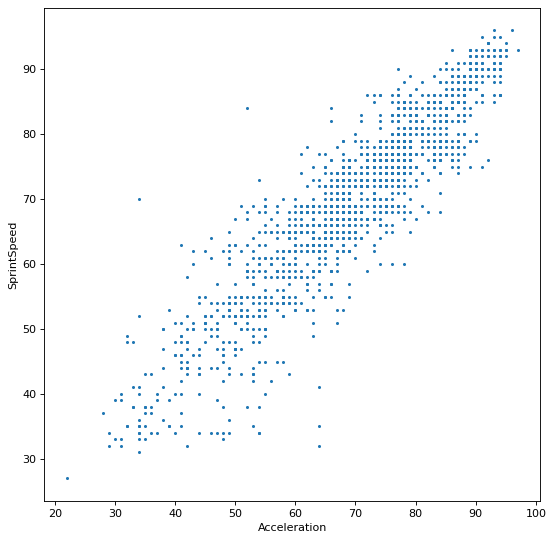

In [53]:
plt.figure(figsize=(8,8), dpi=80)

plt.scatter(df_skills[skill_1], y=df_skills[skill_2],s=3,cmap='jet')

plt.xlabel(skill_1)
plt.ylabel(skill_2)
plt.show()

#### Ejercicio
Cambiar las variable elegidas e interpretar. Que significa cada punto en el scatterplot?

¿cómo vemos más de dos variables a la vez?

#### pairplot

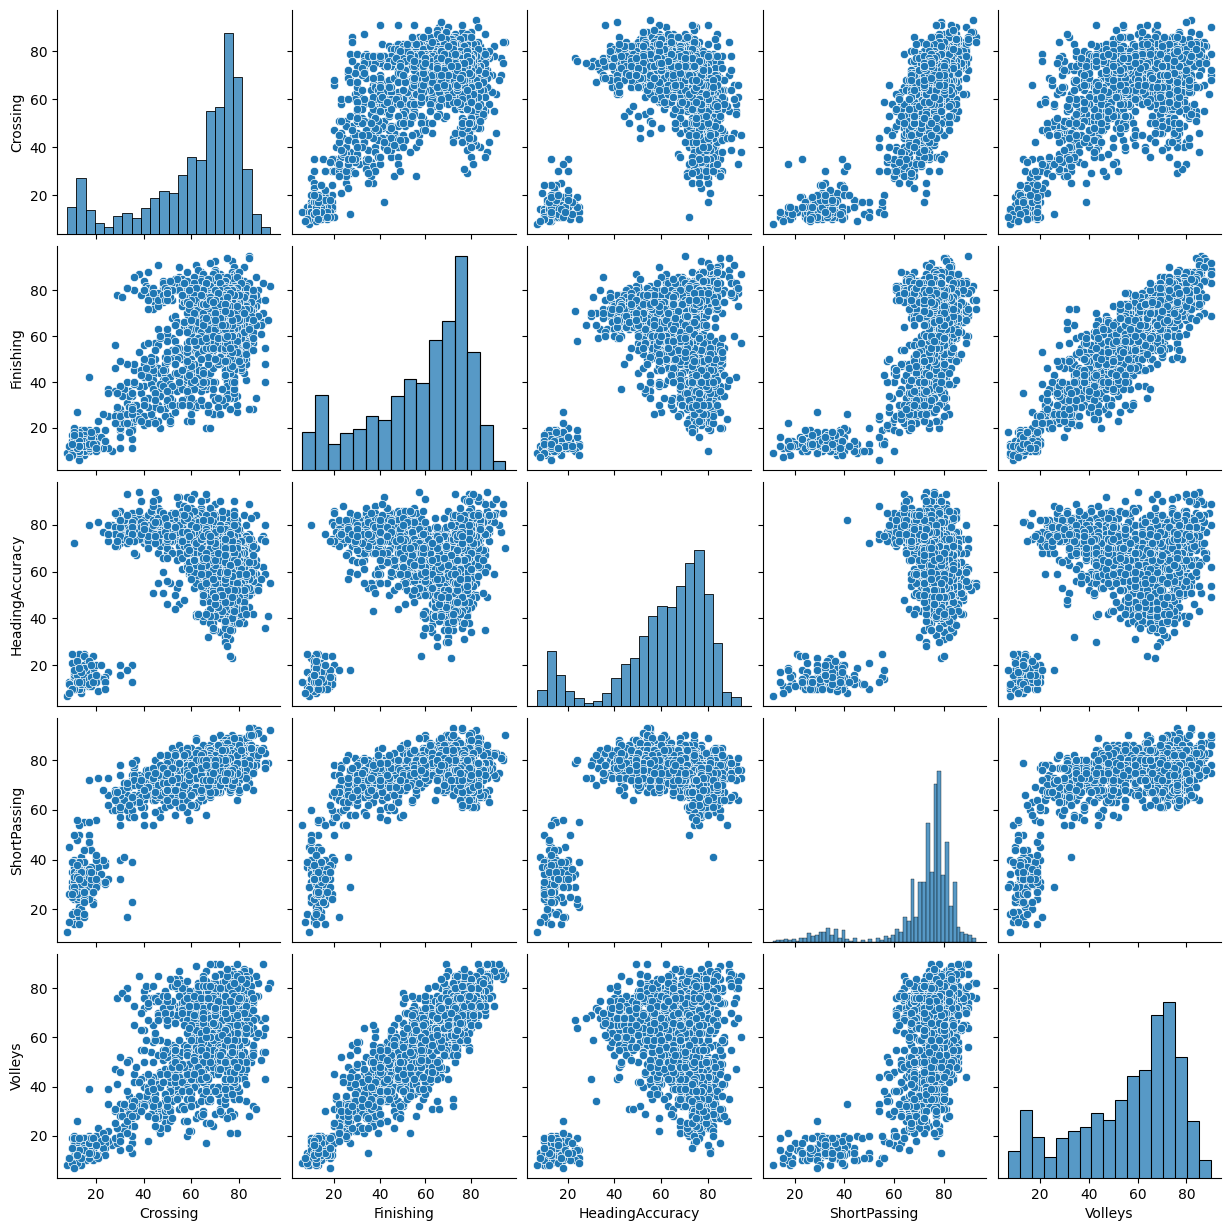

In [54]:
seaborn.pairplot(df_skills[skills_ratings[0:5]])

## Vinos

In [55]:
datos = load_wine() #base de datos la guardamos en la variable data
print(type(datos))
print(type(datos.data))
print(type(datos.feature_names))

<class 'sklearn.utils._bunch.Bunch'>
<class 'numpy.ndarray'>
<class 'list'>


In [56]:
print(np.shape(datos.data))
print(len(datos.feature_names))
print(datos.feature_names)
cols=datos.feature_names

(178, 13)
13
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [57]:
df = pd.DataFrame(datos.data, columns=datos.feature_names)
print(df.shape)
df.head(5)

(178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


**wine**  es un conjunto de datos clásico

Samples total	178

Dimensionality	13

Features	real, positive

Es decir, son n=178 registros (instancias o muestras) con m=13 característica/variable/feature numéricas reales positivas


(ver más detalles en https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html)



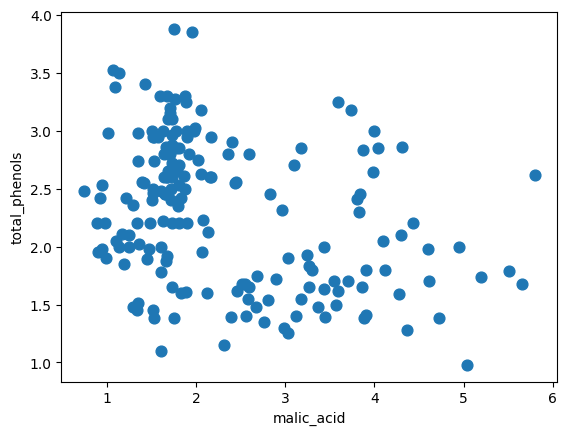

In [58]:
#scatterplot de a dos variables
var1, var2 = datos.feature_names[1] , datos.feature_names[5]#nombres de las variables/características

f1, f2 = df[var1].values, df[var2].values

plt.scatter(f1, f2, s=60)
plt.xlabel(var1)
plt.ylabel(var2)
plt.show()

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


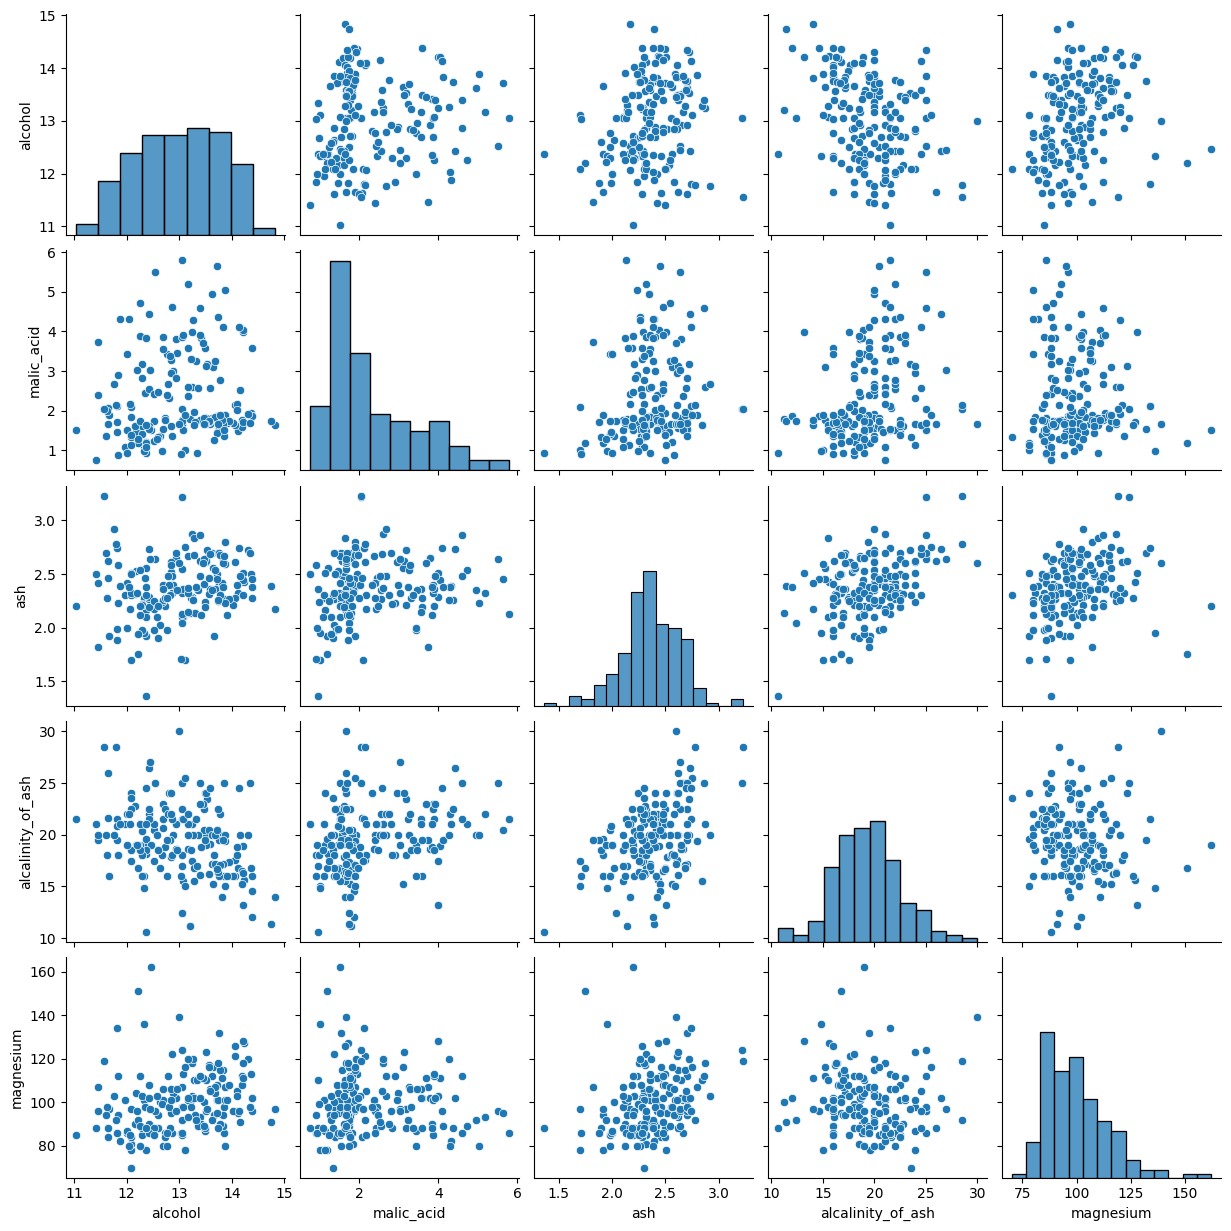

In [59]:
columnas=datos.feature_names
print(columnas)
seaborn.pairplot(df[columnas[0:5]])

## Formalizamos un poco ...


Datos:

El individuo, objeto, muestra nro $i$ esá representado por un vector con características o datos que lo caracterizan:

$\underline{x}_i=(x_{i1},..,x_{im})$

$m$  es la cantidad de variables/medidas/características

$i=1,..,n$,

$n=$ cantidad de observaciones/registros/muestras/objetos

Luego todos los datos se guardan en una matriz con $n$ filas y $m$ columnas:

$X=\begin{bmatrix}
 x_{1 1}& \cdots  & x_{1 m}\\
 \vdots &  \ddots &\vdots \\
 x_{n 1}& \cdots  & x_{n m}
\end{bmatrix}$



Cuando:

- $x_{i j}\in R$, variable $j$ es numérica (contínua, contínua discretizada o discreta}

- $x_{i j} \in \{c_1,,..,c_k\}$, variable $j$ es categórica,



In [60]:
X=datos.data # datos puros
print(X.shape)

print(X)
df.tail(5)

(178, 13)
[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0


### Normalizamos, escalamos, estandarizamos las variables
si se necesita escalar o estandarizar los datos(z-score, o "normalizar") por columna. O llevar a cada variable a un intervalo de valores común, es decir por columna.

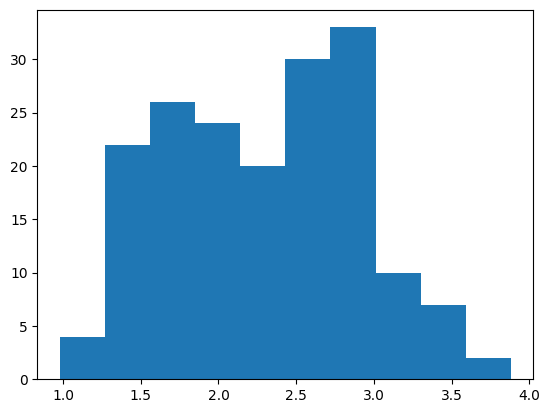

total_phenols


In [61]:
#X=datos.data # datos puros
plt.hist(X[:,5]) #histograma de los datos de una variable o columna

plt.show()
print(columnas[5])

In [62]:
m=np.mean(X[:,5])
s=np.std(X[:,5])
print(m)
print(s)

2.295112359550562
0.6240905641965369


In [63]:
#from sklearn import preprocessing

std_scale=preprocessing.StandardScaler().fit(X) #resta la media  de cada columna y luego divide por el desvío
X_scaled=std_scale.transform(X) # media 0 y desvío 1 por columnas

In [64]:
print(X_scaled)
print(X_scaled.shape)

[[ 1.51861254 -0.5622498   0.23205254 ...  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 ...  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 ...  0.31830389  0.78858745
   1.39514818]
 ...
 [ 0.33275817  1.74474449 -0.38935541 ... -1.61212515 -1.48544548
   0.28057537]
 [ 0.20923168  0.22769377  0.01273209 ... -1.56825176 -1.40069891
   0.29649784]
 [ 1.39508604  1.58316512  1.36520822 ... -1.52437837 -1.42894777
  -0.59516041]]
(178, 13)


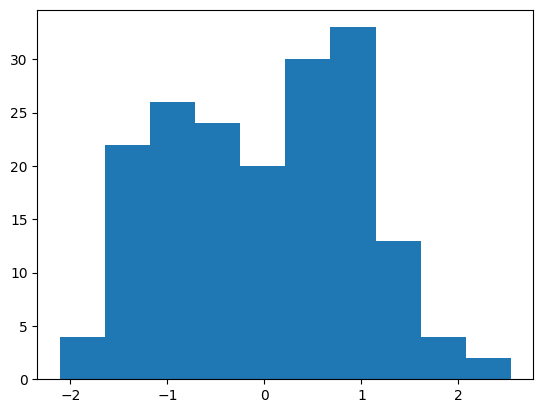

In [65]:
plt.hist(X_scaled[:,5]) #histograma de los datos de una variable (columna) luego de estandarizar
plt.show()

Que tipo de transformación es?

In [66]:
mm=np.mean(X_scaled[:,5])
ss=np.std(X_scaled[:,5])
print(mm)
print(ss)

-3.991813122247754e-17
1.0000000000000002


MinMax scaler?
[link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [67]:
minmax_scale=preprocessing.MinMaxScaler().fit(X) #resta el mínimo y luego divide por (max-min)
X_mm_scaled=minmax_scale.transform(X)

(array([ 4., 22., 26., 24., 20., 30., 33., 10.,  7.,  2.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

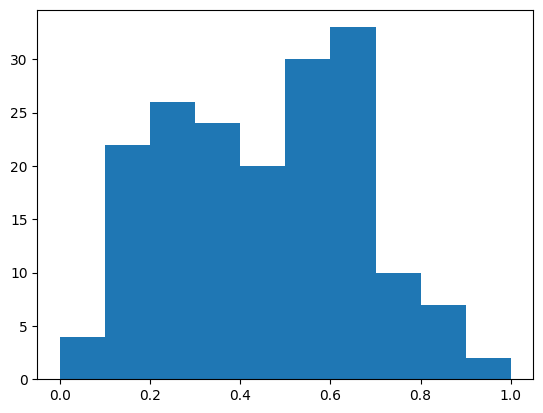

In [68]:
plt.hist(X_mm_scaled[:,5]) #histograma de los datos de una variable (columna) luego de escalar

Este ejemplo (wine) también tiene una variable categórica.

Cada registro está clasificado en una de 3 clases, es decir existe una variable más, categórica

59 primeros de una clase, 71 de una segunda y loa 48 últimos de otra  

(Samples per class	[59,71,48])


In [69]:
print('y=',datos.target)
print(type(datos.target))
print(len(datos.target))
print(datos.target_names)

y= [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
<class 'numpy.ndarray'>
178
['class_0' 'class_1' 'class_2']


Es decir:

$y_i \in \{\text{'class_0', 'class_1','class_2'} \}$
o bien

$y_i \in \{0,1,2\}$

**si queremos aprender a predecir esa etiqueta podemos usar aprendizaje supervizado**, lo veremos en próxima/s clase/s



<Axes: ylabel='count'>

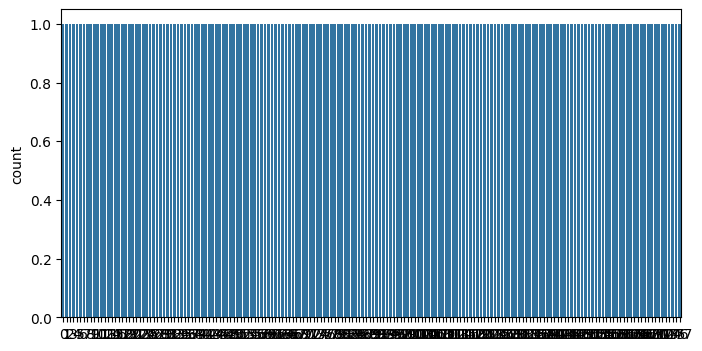

In [70]:
fig = plt.figure(figsize=(8,4))
seaborn.countplot(datos.target)

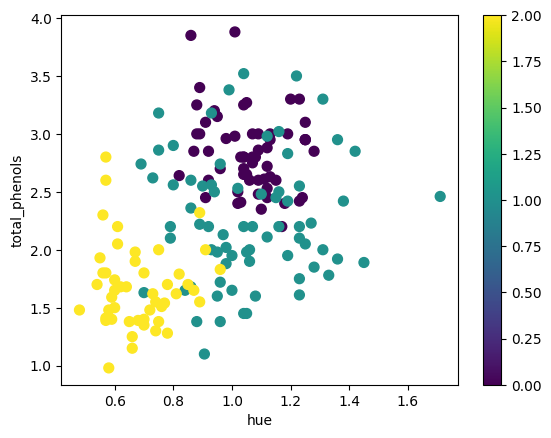

In [71]:
variable1=datos.feature_names[10]
variable2=datos.feature_names[5]

f1 = df[variable1].values
f2 = df[variable2].values
f3 = datos.target

l=len(f3)

plt.scatter(f1, f2, c=f3, s=50)
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.colorbar()
plt.show()

In [72]:
print('cantidad de observaciones:',l)
print('cantidad de clases:',3)
print('cantidad de variables/dimension:',13)
print('se grafican de a dos (dimensión 2)')

cantidad de observaciones: 178
cantidad de clases: 3
cantidad de variables/dimension: 13
se grafican de a dos (dimensión 2)


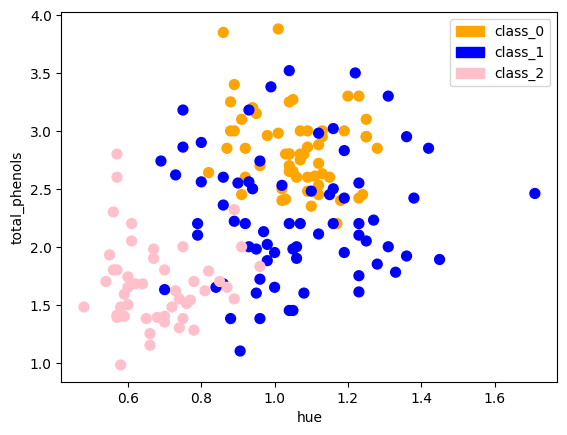

In [73]:
#import matplotlib.patches as mpatches
variable1=datos.feature_names[10]
variable2=datos.feature_names[5]

f1 = df[variable1].values
f2 = df[variable2].values
f3 = datos.target

colores=['orange','blue','pink']
# Vamos a pintar en colores las 3 clases: naranja: 0, azul:1, rosa:2
asignar=[]
#l=len(f3)

for i in range(l): #for index, row in filtered_data.iterrows():
    if(f3[i]==0):
        asignar.append(colores[0])
    elif (f3[i]==1):
        asignar.append(colores[1])
    else:
        asignar.append(colores[2])
plt.scatter(f1, f2, c=asignar, s=50)
plt.xlabel(variable1)
plt.ylabel(variable2)

patch1 = mpatches.Patch(color=colores[0], label=datos.target_names[0])
patch2 = mpatches.Patch(color=colores[1], label=datos.target_names[1])
patch3 = mpatches.Patch(color=colores[2], label=datos.target_names[2])

plt.legend(handles=[patch1,patch2,patch3])
plt.show()

## RGB

Cada pixel tiene un vector de datos o características, puede tener una, tres o más (características/datos).

**Ejemplos:**

- Imágenes a color RGB,  cada pixel $(x_r, x_g, x_b)$, 3 variables
- Imágenes satelitales: cada pixel tiene B datos, donde B es la cantidad de bandas o sensores del satélite.

Se pueden usar las B bandas y/o combinaciones de éstas, como por ejemplo, el NDVI (índice verde o de vegetación).


**Índice verde** en cada pixel obtenido de imágenes satelitales:

$$NDVI= \frac{(IRC-r)}{(IRC+r)}$$

donde $IRC$ es el Infrarrojo cercano
y $r$ es la componente roja (del visible)

In [75]:
campo_cv=cv2.imread('/Users/niconash/Desktop/Curso Imágenes Python/Imágenes necesarias/Campo.png')
print(campo_cv.shape)
campo=campo_cv.copy()
campo[:,:,[2,1,0]]=campo_cv

(359, 479, 3)


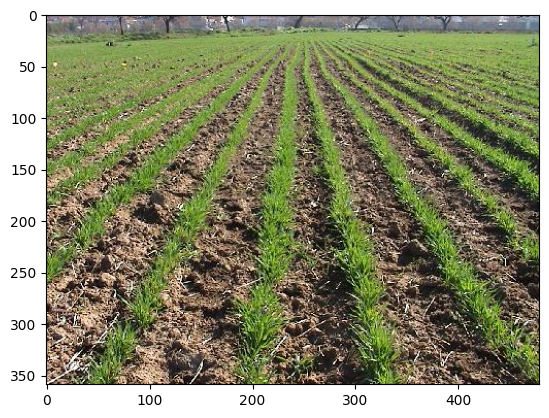

In [76]:
plt.imshow(campo)
plt.show()

In [77]:
print('un pixel particular, RGB:', campo[50,100,:])

un pixel particular, RGB: [119 125  77]


In [78]:
ind=np.indices((3,4)) #una capa con filas y otra con columnas
print(ind)


[[[0 0 0 0]
  [1 1 1 1]
  [2 2 2 2]]

 [[0 1 2 3]
  [0 1 2 3]
  [0 1 2 3]]]


In [79]:
ind[0]

array([[0, 0, 0, 0],
       [1, 1, 1, 1],
       [2, 2, 2, 2]])

In [80]:
ind[0].flatten() #filas

array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2])

In [81]:
ind[0].ravel()

array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2])

### RGB a Data Frame

In [83]:
flor_cv=cv2.imread('/Users/niconash/Desktop/Curso Imágenes Python/Imágenes necesarias/daisy.jpg')
print(flor_cv.shape)
flor=flor_cv.copy()
flor[:,:,[2,1,0]]=flor_cv

(354, 364, 3)


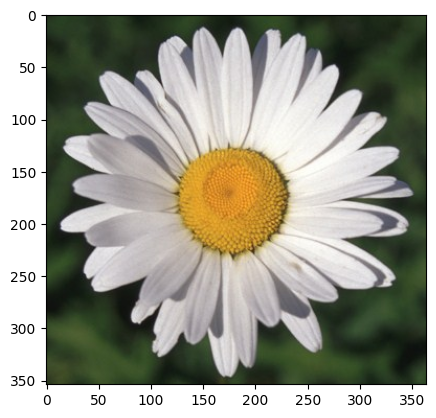

In [84]:
plt.imshow(flor)
plt.show()

In [85]:
#imagen=campo.copy()
imagen=flor.copy()

In [86]:
 # también pueden ver: https://stackoverflow.com/questions/49649215/pandas-image-to-dataframe Gracias Francisco!

dims=imagen.shape

cant_filas=dims[0]
cant_columnas=dims[1]
ind=np.indices((cant_filas,cant_columnas)) # arreglo con matriz de filas y  matriz de columnas

cant_pixeles=cant_filas*cant_columnas

#columnas=np.zeros([cant_pixeles,5],dtype='int')

datos=np.zeros([cant_pixeles,5],dtype='int')

datos[:,0]=ind[0].flatten() #filas
datos[:,1]=ind[1].flatten() #columnas
datos[:,2]=imagen[:,:,0].flatten() #rojo
datos[:,3]=imagen[:,:,1].flatten() # verde
datos[:,4]=imagen[:,:,2].flatten() # azul

df = pd.DataFrame(datos, columns=["fila", "columna","rojo","verde","azul"])

print(df.shape)
print('Base de pixeles:')
df.head()

(128856, 5)
Base de pixeles:


,fila,columna,rojo,verde,azul
0,0,0,34,42,27
1,0,1,35,43,28
2,0,2,33,44,28
3,0,3,34,45,29
4,0,4,33,46,28


In [87]:
#359*479

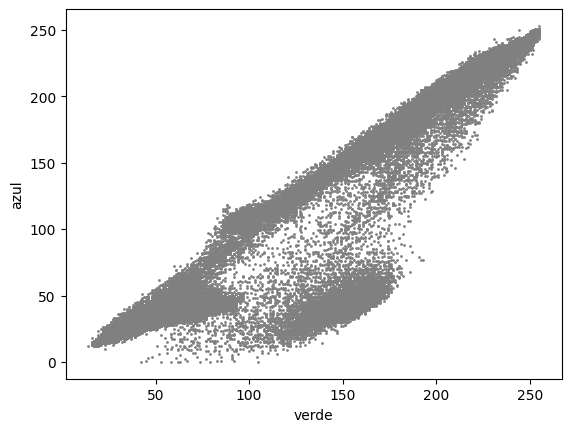

In [88]:
variables=["rojo","verde","azul"]

variable1=variables[1]
variable2=variables[2]

f1 = df[variable1].values
f2 = df[variable2].values

plt.scatter(f1, f2,c='gray', s=1)
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.show()

#### Ejercicio
que es cada punto en la gráfica? interprete

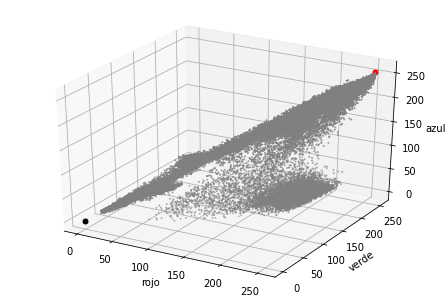

In [ ]:
#from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()

#ax = Axes3D(fig)
ax = fig.add_subplot(111,projection='3d')
#cambiar esta linea porque la anterior no funciona mas

ax.scatter(df[variables[0]].values, df[variables[1]].values, df[variables[2]].values,c='gray', s=1)
ax.scatter(0,0, 0,c='black', s=25)
ax.scatter(255,255, 255,c='red', s=25)

ax.set_xlabel(variables[0])
ax.set_ylabel(variables[1])
ax.set_zlabel(variables[2])
plt.show()


#### Ejercicio
que es cada punto en la gráfica? interprete

dónde ubicaría un pixel blanco? donde uno gris? donde uno verde oscuro?

visualizar histogramas, que puede decir?


**Podemos agregar más información? Se pueden agregar más capas/columnas de datos, por ejemplo...**

* **combinar capas: dif_r-g, diferencia entre rojo y azul**
* **una capa con los bordes (Filtros Prewitt, Sobel, etc.)**
* **una capa/columna con la intensidad, imagen monocroma**
* **una capa con información de textura (Filtros de Gabor, etc.)**

**Ejercicio: agregar alguna/s** tener en cuenta si las operaciones son pixel a pixel o necesitan filtros espaciales

In [ ]:
df['dif_r-g']=df["rojo"]-df["verde"]
df.head()

,fila,columna,rojo,verde,azul,dif_r-g
0,0,0,34,42,27,-8
1,0,1,35,43,28,-8
2,0,2,33,44,28,-11
3,0,3,34,45,29,-11
4,0,4,33,46,28,-13


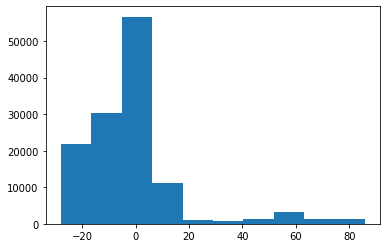

In [ ]:
#Histograma
plt.hist(df['dif_r-g'])
plt.show()

In [ ]:
df['dif_r-b']=df["rojo"]-df["azul"]
df.head()

,fila,columna,rojo,verde,azul,dif_r-g,dif_r-b
0,0,0,34,42,27,-8,7
1,0,1,35,43,28,-8,7
2,0,2,33,44,28,-11,5
3,0,3,34,45,29,-11,5
4,0,4,33,46,28,-13,5


#### Ejercicio: agregar variable intensidad al Data frame


In [ ]:
df['intensidad']=0.2125*df["rojo"]+0.7154*df["verde"]+0.0721*df["azul"]
df.head()

,fila,columna,rojo,verde,azul,dif_r-g,dif_r-b,intensidad
0,0,0,34,42,27,-8,7,39.2185
1,0,1,35,43,28,-8,7,40.2185
2,0,2,33,44,28,-11,5,40.5089
3,0,3,34,45,29,-11,5,41.5089
4,0,4,33,46,28,-13,5,41.9397


In [ ]:
monocroma=cv2.imread('daisy.jpg',0) #paso la imagen a monocroma
datos1=monocroma.flatten()
df['intensidad_2']=datos1 #la agrego al data.frame

In [ ]:
df.head()

,fila,columna,rojo,verde,azul,dif_r-g,dif_r-b,intensidad,intensidad_2
0,0,0,34,42,27,-8,7,39.2185,38
1,0,1,35,43,28,-8,7,40.2185,39
2,0,2,33,44,28,-11,5,40.5089,39
3,0,3,34,45,29,-11,5,41.5089,40
4,0,4,33,46,28,-13,5,41.9397,40


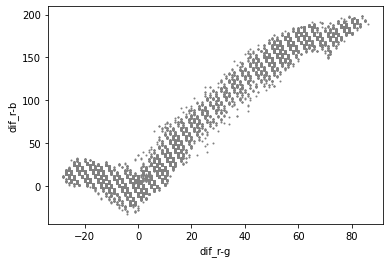

In [ ]:
f1 = df['dif_r-g'].values
f2 = df['dif_r-b'].values

plt.scatter(f1, f2,c='gray', s=1)
plt.xlabel('dif_r-g')
plt.ylabel('dif_r-b')
plt.show()

#### Ejercicio:
llevar la imagen daisy (o Dori) a Data Frame y graficar en el espacio RGB

Opcional;
generar una función que tome una imagen RGB y la pase a Data Frame y aplicárselo a Daisy (o a Dori)

# Descomposición ACP o PCA (Principal Components Analisis)

Análisis de Componentes Principales

En la descomposición podemos elegir n_components para quedarnos con una cantidad chica de componentes

Se suele usar para reducir la dimensionalidad de los datos, la idea es que n_components sea "bastante" menos que la dimensión $m$ de lo datos pero que describan un buen porcentaje de la dispersión de estos.

Para más detalles y ejemplos pueden ver: https://programmathically.com/principal-components-analysis-explained-for-dummies/

Es una transformación de los datos en otro espacio (proyección/embedding).

Las proyecciones o embeddings son útiles para quedarse con las características relevantes a nuestro problema (Selección de Características / Ingeniería de características)

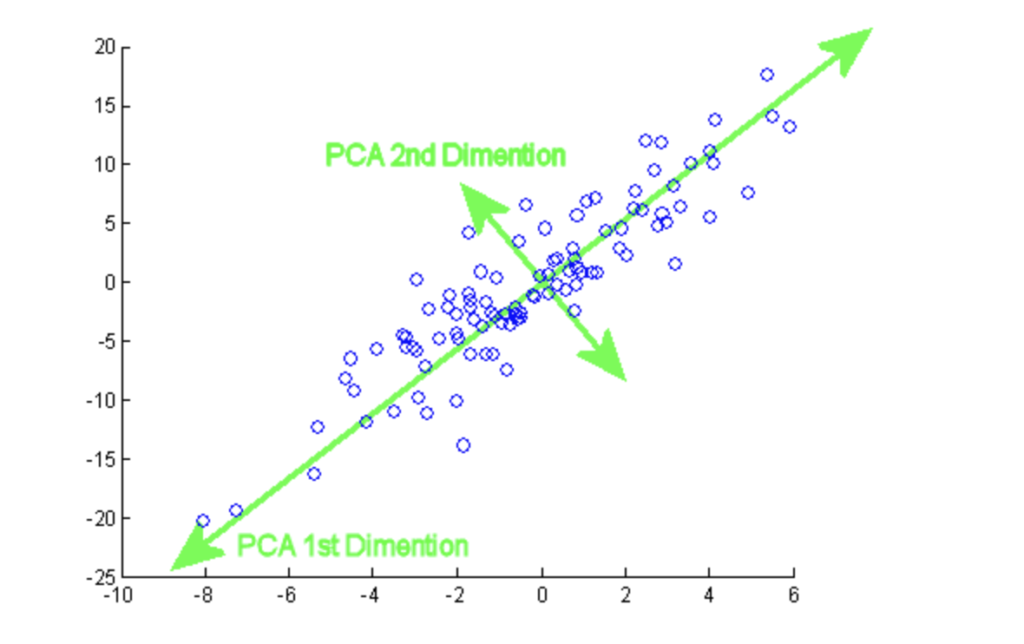

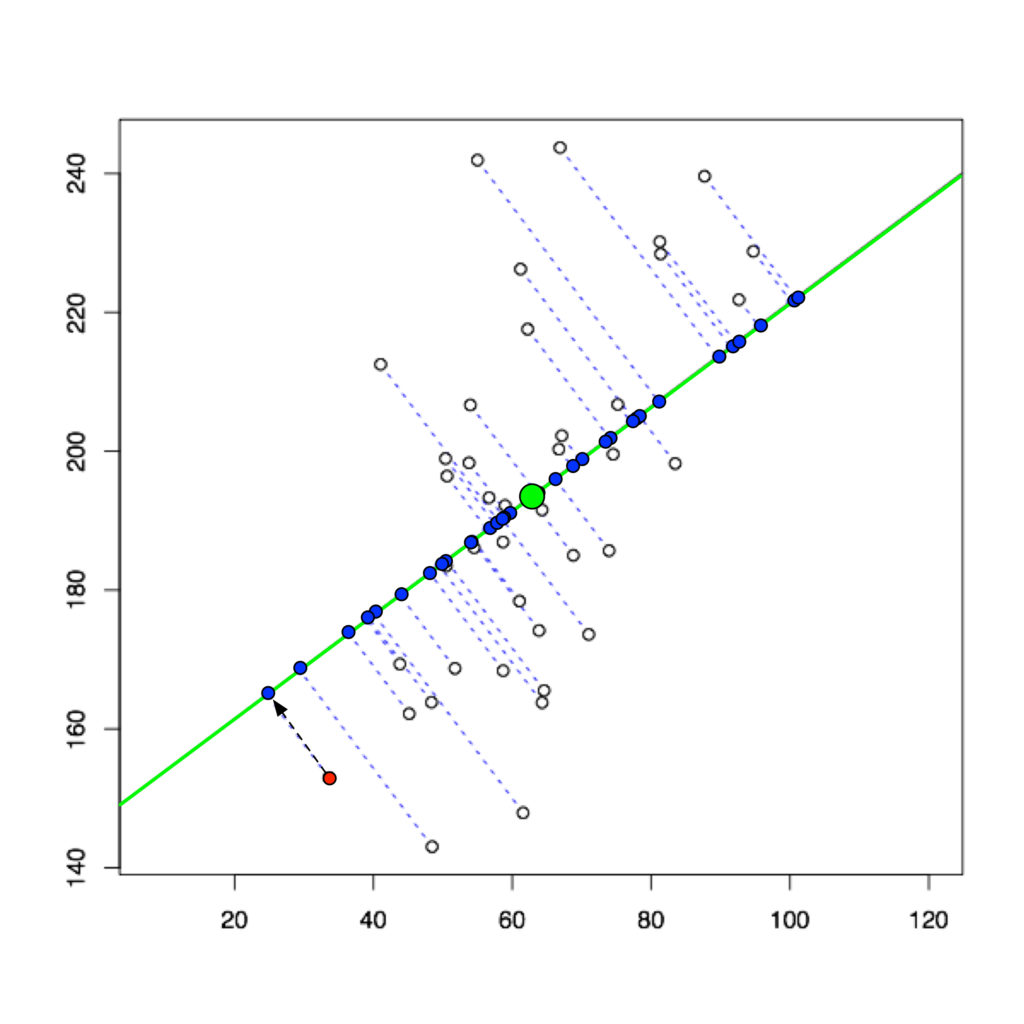

In [ ]:
X=datos[:,2:5] # sólo r,g,b
std_scale=preprocessing.StandardScaler().fit(X)
X_scaled=std_scale.transform(X) # numpyarray normalizado por columna

In [ ]:
from sklearn import decomposition
pca=decomposition.PCA(n_components=3) #elegimos 3  pueden ser menos,

pca.fit(X_scaled) #input data is centered but not scaled for each feature before applying the SVD

# proporción de varianza
print('proporción de varianza por componente: ', pca.explained_variance_ratio_)
# proporción de varianza acumulada
print ('proporción de varianza por componente acumulada: ', pca.explained_variance_ratio_.cumsum())

X_projected=pca.transform(X_scaled) #numpy array
print ('tamaño de los datos: ', X_projected.shape)

proporción de varianza por componente:  [0.9606409  0.03743772 0.00192138]
proporción de varianza por componente acumulada:  [0.9606409  0.99807862 1.        ]
tamaño de los datos:  (128856, 3)


**Ejercicio: graficar componentes 2 y 3**

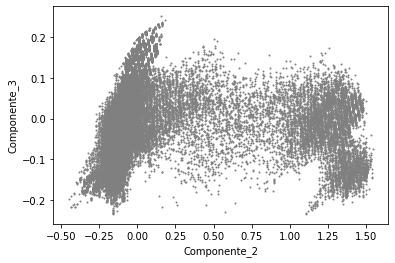

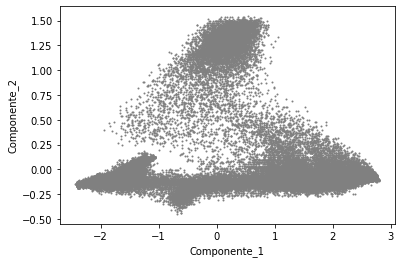

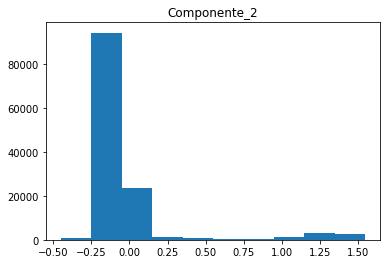

In [ ]:
variable1="Componente_2"
variable2="Componente_3"

f1 = X_projected[:,1]
f2 = X_projected[:,2]

plt.scatter(f1, f2,c='gray', s=1)
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.show()

variable0="Componente_1"

f0 = X_projected[:,0]

plt.scatter(f0, f1,c='gray', s=1)
plt.xlabel(variable0)
plt.ylabel(variable1)
plt.show()

#Histograma
plt.hist(f1)
plt.title(variable1)
plt.show()

#### Ejercicio
Levar la segunda componente a imagen monocroma
Binarice la imagen original utilizando alguna segunda componente principal. Grafique

ayuda: reshape

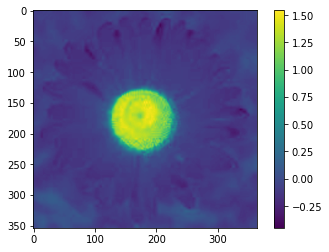

In [ ]:
f1 = X_projected[:,1]
imagencomponente2=f1.reshape((cant_filas,cant_columnas))
plt.imshow(imagencomponente2)
plt.colorbar()